# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Lucca Claro</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


---

**Question 1**

An important skill when studying, testing, and developing new Machine Learning models is the capacity to make test data to explore your understanding of the techniques. In this question you will write functions to make fake datasets to test linear regression.

Look at the example below:

In [2]:
def make_dataset() -> np.array:
    num_points = 100
    num_features = 2
    noise = 0.1

    # Make the features.
    X = np.random.randn(num_points, num_features)

    # Make the target.
    y_real = 1 + 2 * X[:, 0] + 3 * X[:, 1]

    # Add noise.
    y_observed = y_real + np.random.normal(0, noise, num_points)

    return X, y_observed

The functions above work by making a fake set of sample features, and computing a target value according to a linear model plus some noise. Here is an example of use:

In [3]:
X, y = make_dataset()

In [4]:
X.shape, y.shape

((100, 2), (100,))

So, the data generation process above makes $y = 1 + 2 x_1 + 3 x_2 + \text{noise}$

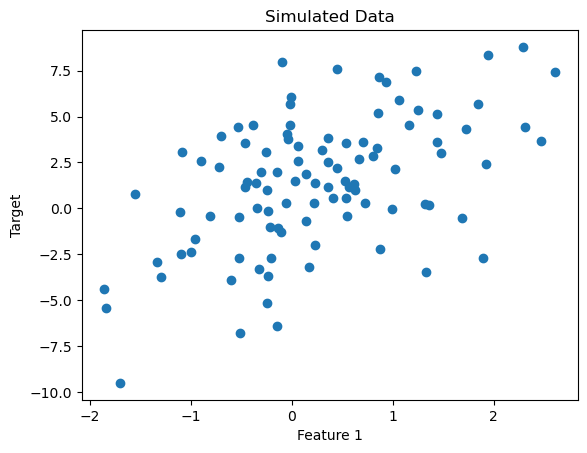

In [5]:
plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()

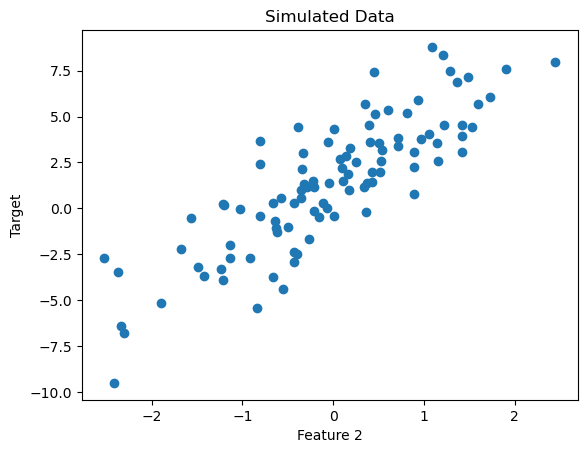

In [6]:
plt.scatter(X[:, 1], y)
plt.xlabel("Feature 2")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()

Now, based on the preceding examples, answer the following questions:

(a) (1.0 pts) Split the generated data into train and test datasets. Fit a linear model to the training set and measure the RMSE in the test set.


---

**Answer**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(    X,
    y,
    test_size=0.2,
    random_state=42,
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.12054121869548057


---

(b) (1.0 pts) Make a new dataset as described:

- Features 1 and 2 are random values, with standard normal distribution. Hint: use `np.random.randn` as in the example
- Feature 3 is $x_3 = 2 x_1 + 3 x_2$
- Target is $y = 4 x_1 + 5 x_2 + 6 x_3$

You can use the `make_dataset` function above as inspiration, of course.


---

**Answer**

In [12]:
def make_new_dataset() -> np.array:
    num_points = 100
    noise = 0.1

    X1 = np.random.randn(num_points)
    X2 = np.random.randn(num_points)

    X3 = 2 * X1 + 3 * X2

    X = np.column_stack((X1, X2, X3))

    y = 4 * X1 + 5 * X2 + 6 * X3

    y_observed = y + np.random.normal(0, noise, num_points)

    return X, y_observed

X_new, y_new = make_new_dataset()

In [13]:
X_new.shape, y_new.shape

((100, 3), (100,))


---

(c) (1.0 pts) Test two Ridge models to the new dataset: one using $\alpha = 10^{-3}$ and another using $\alpha = 10^{5}$. Explain the difference between the parameters obtained (`model.intercept_`, `model.coefs_`)


---

**Answer**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new,
    y_new,
    test_size=0.2,
    random_state=42,
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 3), (20, 3), (80,), (20,))

In [15]:
from sklearn.linear_model import Ridge


ridge_model_1 = Ridge(alpha=1e-3)
ridge_model_1.fit(X_train, y_train)


ridge_model_2 = Ridge(alpha=1e5)
ridge_model_2.fit(X_train, y_train)


print("Ridge model with alpha=1e-3")
print("Intercept:", ridge_model_1.intercept_)
print("Coefficients:", ridge_model_1.coef_)

print("\nRidge model with alpha=1e5")
print("Intercept:", ridge_model_2.intercept_)
print("Coefficients:", ridge_model_2.coef_)

Ridge model with alpha=1e-3
Intercept: 0.00454902651906397
Coefficients: [1.57953826 1.35136959 7.21318528]

Ridge model with alpha=1e5
Intercept: 0.9397557877657515
Coefficients: [0.01561323 0.01892586 0.08800405]


Para o primeiro modelo Ridge, os valores do coeficientes são diferentes entre si, já o segundo modelo de Ridge possui os valores do coeficientes parecidos. A diferença entre os paramentros dos coeficientes mostra que o menor alpha não está fazendo a previsão correta, já que os coeficientes estão muito próximos de zero, muito distante do igual. Enquanto o maior alpha está melhor, uma vez que chega mais perto dos coeficientes reais. 


---

(d) (1.0 pts) Make a new dataset as described:

- Only one feature $x$, made of random values of standard normal distribution.
- But the target is $y = 1 + 2 x + 3 x^2$


---

**Answer**

In [16]:
def make_n_dataset() -> np.array:
    num_points = 100
    noise = 0.1

    # Make the features.
    X1 = np.random.randn(num_points)

    y = 3 * X1**2 + 2 * X1 + 1

    y_observed = y + np.random.normal(0, noise, num_points)

    return X, y_observed

# Generate the new dataset
X_n, y_n = make_n_dataset()


---

(e) (1.0 pts) Fit an adequate linear model to the dataset of item (d). 

Hint: you may need `sklearn.preprocessing.PolynomialFeatures`.

Hint 2: you may need a `sklearn.pipeline.Pipeline`: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#displaying-a-pipeline-chaining-multiple-preprocessing-steps-classifier

Hint 3: If using `PolynomialFeatures`, don't forget to use the argument `include_bias=False`


---

**Answer**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_n,
    y_n,
    test_size=0.2,
    random_state=42,
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [19]:
y_poly_pred_train = poly_model.predict(X_poly_train)


---

**Question 2**

The following function simulates a dataset $X$ of customers versus products, and the value in $X_{i,j}$ means the number of items of product $j$ purchased by customer $i$. Ignore its internal workings.

In [75]:
def make_dataset():
    np.random.seed(42)

    num_customers = 1000
    num_purchases = 300

    pc = np.array([1, 1, 1, 1, 1])
    pc = np.exp(pc)
    pc = pc / np.sum(pc)

    p = np.array([
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
    ])
    p = np.exp(0.7*p)
    p = p / np.sum(p, axis=1)[:, np.newaxis]

    C = np.random.choice(len(pc), size=(num_customers, 1), p=pc)

    Pk = []
    for k in range(p.shape[0]):
        Pki = []
        for i in range(p.shape[1]):
            Pki.append(
                np.random.binomial(
                    n=num_purchases,
                    p=p[k, i],
                    size=(num_customers, 1),
                ))
        Pk.append(np.hstack(Pki))

    P = np.zeros((num_customers, p.shape[1]))
    for k in range(p.shape[0]):
        P += Pk[k] * (C == k)

    df = pd.DataFrame(P, columns=[f'product_{k+1}' for k in range(p.shape[1])])
    return df
    
X = make_dataset()

In [76]:
X

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9
0,33.0,26.0,28.0,40.0,34.0,55.0,27.0,31.0,23.0
1,34.0,31.0,26.0,42.0,24.0,33.0,21.0,28.0,59.0
2,24.0,31.0,32.0,29.0,24.0,27.0,34.0,58.0,28.0
3,35.0,31.0,31.0,36.0,36.0,33.0,59.0,32.0,35.0
4,34.0,27.0,31.0,25.0,62.0,23.0,28.0,33.0,28.0
...,...,...,...,...,...,...,...,...,...
995,32.0,36.0,29.0,37.0,55.0,33.0,40.0,28.0,29.0
996,34.0,31.0,23.0,22.0,26.0,26.0,29.0,21.0,73.0
997,22.0,27.0,28.0,28.0,52.0,26.0,26.0,29.0,33.0
998,34.0,25.0,33.0,23.0,27.0,28.0,33.0,33.0,69.0


So we have $1000$ customers and $9$ products.


---

(a) (1.0 pts) For each number of clusters from 2 to 10, perform a KMeans clustering on the dataset $X$ and compute the silhouette score


---

**Answer**

In [77]:
X.describe()

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,30.044000,29.895000,29.857000,29.846000,36.594000,35.755000,35.697000,35.60200,35.922000
std,5.025268,5.046924,5.186082,5.134067,13.985448,12.988675,13.072493,13.08246,13.475292
min,15.000000,11.000000,14.000000,17.000000,14.000000,17.000000,16.000000,14.00000,14.000000
25%,26.000000,26.000000,26.000000,26.000000,27.000000,27.000000,27.000000,27.00000,27.000000
50%,30.000000,30.000000,30.000000,30.000000,31.000000,31.000000,31.000000,31.00000,32.000000
75%,34.000000,33.000000,33.000000,33.000000,39.250000,37.000000,38.000000,37.00000,38.000000
max,45.000000,47.000000,47.000000,48.000000,78.000000,82.000000,79.000000,76.00000,82.000000


In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_med = silhouette_score(X, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_med))

for n_clusters, score in silhouette_scores:
    print(f"Número de clusters: {n_clusters}, Silhouette Score: {score}")

Número de clusters: 2, Silhouette Score: 0.202938651868109
Número de clusters: 3, Silhouette Score: 0.28694791482325205
Número de clusters: 4, Silhouette Score: 0.3884500790978319
Número de clusters: 5, Silhouette Score: 0.4992820372663658
Número de clusters: 6, Silhouette Score: 0.41121024932387185
Número de clusters: 7, Silhouette Score: 0.33713382138311054
Número de clusters: 8, Silhouette Score: 0.3090232528777472
Número de clusters: 9, Silhouette Score: 0.3052871728850494
Número de clusters: 10, Silhouette Score: 0.30371213236951106


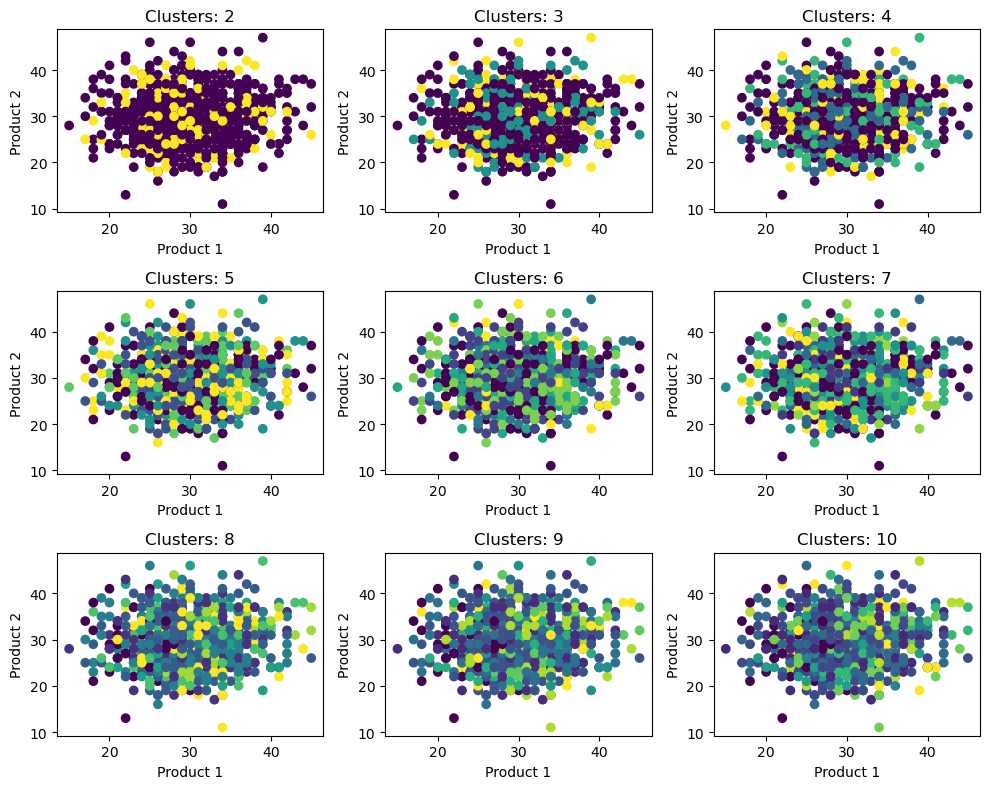

In [79]:
# Plotting the clusters
plt.figure(figsize=(10, 8))

# Loop through each cluster and plot
for n_clusters, _ in silhouette_scores:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    plt.subplot(3, 3, n_clusters - 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.title(f'Clusters: {n_clusters}')
    plt.xlabel('Product 1')
    plt.ylabel('Product 2')

plt.tight_layout()
plt.show()


---

(b) (1.0 pts) Now lets normalize $X$ and compute its SVD:

In [80]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

U, s, Vt = np.linalg.svd(X_norm, full_matrices=False)

We will also multiply $U$ by the singular values, to account for the heightened importance of the first columns of $U$:

In [81]:
U = U * s

In [82]:
U.shape[1]

9

Compute the KMeans clustering of $U$ and calculate the silhouette score for the number of clusters changing from 2 to 10, and the number of columns of $U$ varying from 2 to `U.shape[1]`. Find the best combination of number of columns and clusters.


---

**Answer**

In [83]:
melhor_score = 0
melhor_n_clusters = None
melhor_n_columns = None

silhouette_scores = []

for n_columns in range(2, U.shape[1] + 1):
    U_r = U[:, :n_columns]
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(U_r)
        silhouette_med = silhouette_score(U_r, cluster_labels)
        silhouette_scores.append((n_clusters, silhouette_med))
        
        if silhouette_med > melhor_score:
            melhor_score = silhouette_med
            melhor_n_clusters = n_clusters
            melhor_n_columns = n_columns
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_med = silhouette_score(X, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_med))

for n_clusters, score in silhouette_scores:
    print(f"Número de clusters: {n_clusters}, Silhouette Score: {score}")

print("")
print(f"melhor_n_columns: {melhor_n_columns}")
print(f"melhor_n_clusters: {melhor_n_clusters}")
print(f"Melhor silhouette score: {melhor_score}")

Número de clusters: 2, Silhouette Score: 0.4299455786112652
Número de clusters: 3, Silhouette Score: 0.5342455921646633
Número de clusters: 4, Silhouette Score: 0.4342436722951072
Número de clusters: 5, Silhouette Score: 0.3867177141817825
Número de clusters: 6, Silhouette Score: 0.3624771963946243
Número de clusters: 7, Silhouette Score: 0.35078264356037575
Número de clusters: 8, Silhouette Score: 0.35581842461846125
Número de clusters: 9, Silhouette Score: 0.34315867356674057
Número de clusters: 10, Silhouette Score: 0.3353276252556661
Número de clusters: 2, Silhouette Score: 0.29622600448832476
Número de clusters: 3, Silhouette Score: 0.38767469487259293
Número de clusters: 4, Silhouette Score: 0.5166646281419878
Número de clusters: 5, Silhouette Score: 0.4806546540509459
Número de clusters: 6, Silhouette Score: 0.43162116427173475
Número de clusters: 7, Silhouette Score: 0.37511126843459197
Número de clusters: 8, Silhouette Score: 0.37631256005962077
Número de clusters: 9, Silhouet


---

**Question 3** (3.0 pts)

Here is a list of topics in Machine Learning:

- Train-test split
- Gradient descent
- Feature engineering
- Ridge regularization
- Linear dependence
- Impact of Machine Learning to society

And here is a list of personas:

- A 12-year old teenager with good attention span and that knows basic arithmetic
- An economist
- An engineer of your favorite persuasion
- Your favorite family member
- A social studies professor

Choose two personas and two topics, match persona-topic, and write in your own words an explanation of that topic to that persona.

You will be judged on:

- How correct is the explanation
- How adequate is the exposition to the audience.
    - The explanation must be at an adequate level, both in content and terminology, for the persona
    - The explanation must be engaging to the persona. For instance: choose examples that may pique the person's curiosity

In case you choose your family member, explain which family member and how this person's knowledge relates to your explanation (e.g. "you are the golden child of Yoshua Bengio himself" vs "your beloved family member is your stoner drop-out cousin")


---

**Answer 1**

Persona: Meu irmão de 14 anos (Your favorite family member)

Topic: Train-test split

Explanation: O train-test split é uma maneira de comparar os resultados de um modelo de Machine Learning para que o modelo não seja bom para somente aqueles dados que foram treinados. Por exemplo se você estiver estudando para uma prova de matemática e não sabe nada do conteúdo. Você consegue 10 provas antigas para aprender o conteúdo, sem ter nenhum conhecimento prévio, você olha o gabarito de todas e diz ter aprendido a matéria. No dia da prova, você não sabe fazer algumas questões, pois achou que tinha aprendido o conteúdo. Para não correr esse risco, uma opção seria dividir as provas, olhar o gabarito de 5 e fazer realmente as outras 5, para que você não soubesse apenas fazer aquelas provas. Caso não conseguisse fazer alguma das 5 provas, saberia, antes da prova real, qual conteúdo deveria estudar mais. Essa etapa de divisão entre estudo e treinamento é possibilitada plo Train-test split.


---

**Answer 2**

Persona:An economist

Topic: Feature Engineering

Explanation: 
    Como um economista, um dos problemas infrentados é a análise de dados, principalmente em dados com ruídos. O tratamento dos dados é uma peça importante para qualquer análise. No mercado financeiro, por exemplo, pode-se encontrar outliers, ou valores que não fazem sentido. É preciso melhorar as features analisadas, esse processo é chamado de feature engineering, em que as features de um modelo são estudas para melhorar os resultados. Dentro dessa análise, pode ser feito uma retirada de pontos outliers, pode descartar features que não possuem relação com a target ou mudar as características da feature (One-hot encoding). Portanto feature engineering é algo extremamente importante, principalmente quando se trata de dados do mercado financeiro que são complexos (decisão de quais features utilizar é difícil) e instáveis (com outliers)